# Gossiping on networks



In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def generate_nodes(N):
    x = np.random.rand(N, 1)
    y = np.random.rand(N, 1)
    return [x, y]

def conects_nodes(nodes, conexions=[], numCon=1):
    [x, y] = nodes
    if numCon < 1:
        print('numCon must be > 1')
        return None
    
    if not len(conexions) == 2:
        lin_x = np.zeros([2,2])
        lin_y = np.zeros([2,2])
        
        lin_x[:,0] = np.array(x[[0, 2],0])
        lin_y[:,0] = np.array(y[[0, 2],0])
        lin_x[:,1] = np.array(x[[0, 4],0])
        lin_y[:,1] = np.array(y[[0, 4],0])
        
        return [lin_x, lin_y]
    else:
        [lin_x, lin_y] = conexions
        lin_new_x = np.zeros([lin_x.shape[0], lin_x.shape[1] + numCon])
        lin_new_y = np.zeros(lin_new_x.shape)
        lin_new_x[:,:-numCon] = lin_x[:,:]
        lin_new_y[:,:-numCon] = lin_y[:,:]
        
        for i in range(numCon):
            failedConexion = True
            while failedConexion:
                line = conect_two_nodes(nodes,conexions)
                failedConexion = isAlreadyConected([lin_new_x, lin_new_y], line)
            lin_new_x[0,lin_new_x.shape[1]-1-i] = line[0]
            lin_new_x[1,lin_new_x.shape[1]-1-i] = line[2]
            lin_new_y[0,lin_new_y.shape[1]-1-i] = line[1]
            lin_new_y[1,lin_new_y.shape[1]-1-i] = line[3]
        
        return [lin_new_x, lin_new_y]

def conect_two_nodes(nodes, conexions):
    [x, y] = nodes
    [x_lin, y_lin] = conexions

    rand_pos = [np.random.randint(0,2), np.random.randint(0,x_lin.shape[1])]
    
    first_point_x = x_lin[rand_pos[0],rand_pos[1]]
    first_point_y = y_lin[rand_pos[0],rand_pos[1]]
    
    rand_pos = np.random.randint(0,x.size)
    second_point_x = x[rand_pos,0]
    second_point_y = y[rand_pos,0]
    
    while first_point_x == second_point_x and first_point_y == second_point_y or isAlreadyConected(conexions,
                                                            [first_point_x,first_point_y,second_point_x,second_point_y]):
        rand_pos = np.random.randint(0,x.size)
        second_point_x = x[rand_pos,0]
        second_point_y = y[rand_pos,0]
    
    return [first_point_x, first_point_y, second_point_x, second_point_y]

def isAlreadyConected(conexions, line):
    [x_lin, y_lin] = conexions
    [fst_x, fst_y, scnd_x, scnd_y] = line

    for col in range(x_lin.shape[1]):
        if((x_lin[0,col]==fst_x and y_lin[0,col]==fst_y) and (x_lin[1,col]==scnd_x and y_lin[1,col]==scnd_y)):
            return True
        else: 
            if((x_lin[0,col]==scnd_x and y_lin[0,col]==scnd_y) and (x_lin[1,col]==fst_x and y_lin[1,col]==fst_y)):
                return True
    return False
    
    

## Introducction

Thinking about gossiping, we can find it has very surprisingly propierties:

1. Gossips spreads so fast along the community.
2. There is not a person or group that control it.
3. Once it begins, it is nearly impossible to stop it.
4. It works in small and large communities.
5. It is so easy to participate, just share the gossip with someone.
    
This type of behavoir is similar to epidemics (just change gossip by dissease). So we can apply the models that study the behavoir of epidemics in order to study the gossiping process.

### Why shoud we study the behavior of gossip?

Reformulating the previous propierties:

1. Fast convergence.
2. Descentralized.
3. Robust.
4. Easy to scale.
5. Simple algorithms.

This propierties are very demanded on network environment (among others), so we can apply the knowledge learnt from the gossips and epidemics in order to develop protocols to spread information among networks. This type of protocols are called __Gossip (or Epidemic) Protocols__.

## Background: epidemic models


In order to study and understand the process of gossiping, we must stop to analyze epidemics (as we say before). Fortunately, this topic is studied by many scientists in the area and we have a lot of models to use, from basic to more sofisticated. We are going to review the simplest because they are enough to our purpose.

Let's begin with the environment. We have a population and we divide its individuals in groups (basic models uses only two or three states, but more complex models uses more): susceptibles by the disease, which we denote by _S_, infected by the disease, which we denote by _I_, and remove (dead) or recovered from the disease, which we denote by _R_. To simplify more, we assume that this population is static, namely, there is not birth or death from causes other than the disease under study. Different models provides different ways to change the individuals from one group to another.


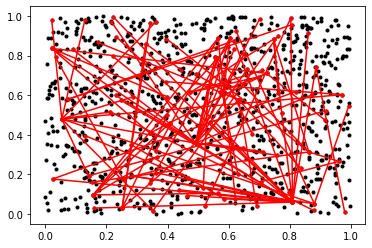

In [58]:
N = 1000
[x, y] = generate_nodes(N)

[con_x, con_y] = conects_nodes([x,y])
for i in range(50):
    [con_x, con_y] = conects_nodes([x,y], [con_x, con_y], 2)

plt.plot(x,y,'.k')
plt.plot(con_x,con_y,'r.-')
plt.show()

### SIR model

This model is the most usefull to migrate the results to the network environment, as we will see later. Group changes of individuals follows the next scheme:

$$S\rightarrow{}I\rightarrow{}R$$

Susceptibles becomes infected at $\beta$ ratio, and infected becomes removed at $\gamma$. This left us the next equations:

$$\frac{dS}{dt}=-\beta{}SI$$

$$\frac{dI}{dt}=\beta{}SI-\gamma{}I$$

$$\frac{dR}{dt}=\gamma{}I$$

Two possibilities:

-  All individuals get infected and later, removed. This case is called 'epidemic'.
-  If $\gamma$ is large enough in comparison of $\beta$, some susceptibles can never reach the infected group.
    

Following models are very simple too, but do not reproduce the behavior as well as SIR does.

### SI model

This is probably the simplest, as only have two groups and the individuals can never get out from infected state. The scheme is:

$$S\rightarrow{}I$$

The only possiblity is that all the individuals becomes infected at some time.

### SIS model

This case is the same as the previous one, but adding the possibility to come back from infected to susceptibles:

$$S\rightarrow{}I\rightarrow{}S$$


## Gossip/Epidemic protocols


Let's substitute the individuals by nodes from some network. The disease is some piece of information to spread along all nodes, so the groups now represent:

- $S$: Nodes waiting for the information.
- $I$: Nodes with the information and sharing it.
- $R$: Nodes with the information but they do not share it.

Just need to create an algorithm that choose the targets to share the information.

The framework is very flexible, so there are many protocols inside this type.

Applications to this protocols are in the area information dissemination for distribution systems, data aggregation, error control, management of topologies,... Specially on large and failure systems. Also highlight on sensor networks.

The proccess is the next:

1. First, we have some network.

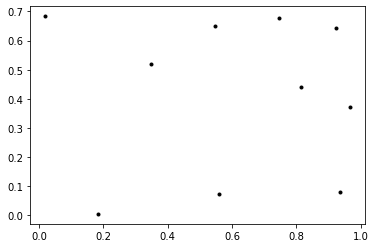

In [59]:
N = 10
[x, y] = generate_nodes(N)

[con_x, con_y] = conects_nodes([x,y])

plt.plot(x,y,'.k')
plt.show()

2. A node wants to share some information over all the network.

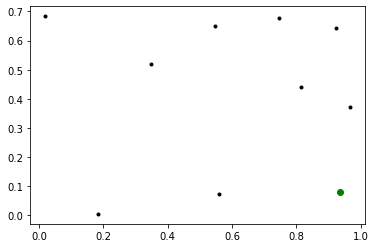

In [62]:
plt.plot(x,y,'.k')
plt.plot(con_x[0,0],con_y[0,0],'og')
plt.show()

3. So the node send it to some neighbour.

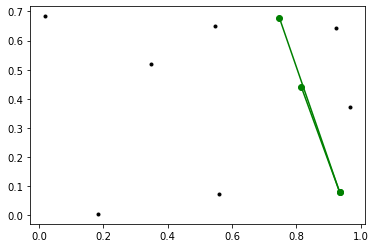

In [64]:
plt.plot(x,y,'.k')
plt.plot(con_x,con_y,'og-')
plt.show()

4. Now, we have three nodes that want to share some information (step 2), so they do.

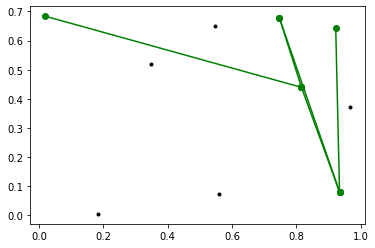

In [65]:
[con_x, con_y] = conects_nodes([x,y], [con_x, con_y], 3)

plt.plot(x,y,'.k')
plt.plot(con_x,con_y,'og-')
plt.show()

5. If we continue with this procedal, at some point, all nodes are going to know the piece of information.

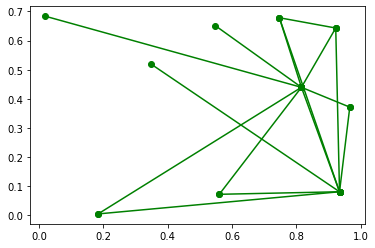

In [66]:
[con_x, con_y] = conects_nodes([x,y], [con_x, con_y], 10)

plt.plot(x,y,'.k')
plt.plot(con_x,con_y,'og-')
plt.show()

This is a simple epidemic algorithm, but allows to visualize some propierties:

- This algorithms work with rounds.
- The information can be sent more than once at the same node. Costly, but give a high tolerance to failures.
- It is difficult to ensure when all nodes know the information.

The aim is try to solve the problems preserving all the advantages.

## Examples and conclusions


First time that the term _gossip protocol_ was named was in a article which proposed a solution to replicate the information of databases in distributed environments (50 years ago approximately). 

Examples of aplication of these algorithms can be <ins>BitTorrent</ins>, a sharing documents peer-to-peer application that use a epidemic protocol to send the information between peers. Or <ins>Cassandra</ins>, a database gestor which uses these protocols to obtain better scalability. Even <ins>Amazon</ins> uses they in its datacenters.

In addition, with 5G and IoT new technologies, these type of algorithms are on the point of view of many researchers, as they have a lot of interesting advantages in these frameworks.

Resuming, the common characteristics of these protocols are:

- Good scalability.
- High fault tolerance and redundancy.
- Descentralization.
- High flexibility.
- Fast convergence.
- Simplicity.

Some of these protocols may not achieve some of them, but sacrifies them to achieve others or to addapt better to some particular environment. 

Epidemic protocols aspire to be very important in near future.